In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
df = pd.read_csv(url)
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### EDA
###### Load the data.
###### Look at the median_house_value variable. Does it have a long tail?

<Axes: xlabel='median_house_value', ylabel='Count'>

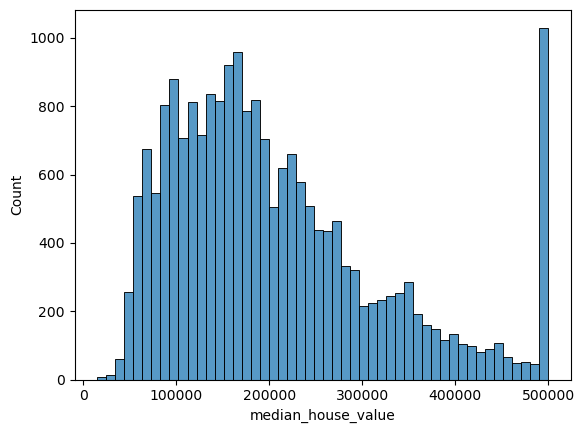

In [5]:
sns.histplot(df['median_house_value'], bins=50)

## Insight: The graph doesn't have a long tail

#### Preparing the dataset
##### For this homework, we only want to use a subset of data.
##### First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

##### Next, use only the following columns:
##### 1. 'latitude',
##### 2. 'longitude',
##### 3. 'housing_median_age',
##### 4. 'total_rooms',
##### 5. 'total_bedrooms',
##### 6. 'population',
##### 7. 'households',
##### 8. 'median_income',
##### 9. 'median_house_value'

In [35]:
#First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
subset_df = df.loc[df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])]
subset_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [37]:
ocean_col = subset_df['ocean_proximity']
ocean_col.head(4)

701    <1H OCEAN
830    <1H OCEAN
859    <1H OCEAN
860    <1H OCEAN
Name: ocean_proximity, dtype: object

In [38]:
#drop the 'ocean_proximity' column
subset_df = subset_df.drop(columns = ['ocean_proximity'],axis=1)
subset_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

### Question 1
##### There's one feature with missing values. What is it?

In [39]:
subset_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

####  total_bedrooms

### Question 2
##### What's the median (50% percentile) for variable 'population'? 

In [42]:
subset_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,15687.0,-119.217442,1.780380,-124.1400,-121.0700,-118.3700,-117.9900,-114.3100
latitude,15687.0,35.467307,2.066387,32.6100,33.9400,34.1600,37.3400,41.9500
housing_median_age,15687.0,27.188118,12.057128,1.0000,17.0000,27.0000,36.0000,52.0000
total_rooms,15687.0,2665.677312,2257.672743,2.0000,1441.0000,2118.0000,3172.0000,39320.0000
total_bedrooms,15530.0,541.244688,435.650018,2.0000,295.0000,432.0000,645.0000,6445.0000
population,15687.0,1466.317205,1180.389908,3.0000,802.0000,1195.0000,1777.0000,35682.0000
households,15687.0,500.916491,392.759399,2.0000,278.0000,406.0000,602.0000,6082.0000
median_income,15687.0,3.804019,1.857158,0.4999,2.5208,3.4688,4.6862,15.0001
median_house_value,15687.0,191943.020017,108801.077620,14999.0000,111300.0000,166900.0000,241100.0000,500001.0000


In [43]:
subset_df['population'].median()

1195.0